# The HDR Plot for the logistic example

## Introduction

The logistic growth model is the differential equation:
$$
y’(t) = ay(t) - by(t)²
$$
for any $t\in[t_0, t_{final}]$, with the initial condition:
$$
y(t_0) = y_0
$$
where
- $a > 0$ and $b > 0$ are two real parameters, 
- $y(t)$ is the size of the population at time $t$, 
- $t_0$ is the initial time,
- $y_0$ is the initial population at time $t=t_0$, 
- $t_{final}$ is the final time.

The $a$ parameter sets the growth rate of the population. The $b$ parameter acts as a competition parameter which limits the size of the population by increasing the competition between its members. 

In [1], the author uses this model to simulate the growth of the U.S. population. To do this, the author uses the U.S. census data from 1790 to 1910. For this time interval, R. Pearl and L. Reed [2] computed the following values of the parameters:
$$
a = 0.03134, \qquad 
b = 1.5887 \times 10^{-10}.
$$

Our goal is to use the logistic growth model in order to simulate the solution for a larger time interval, from 1790 to 2000:
$$
t_0 = 1790, \qquad 
t_{final} = 2000.
$$
Then we can compare the predictions of this model with the real evolution of the U.S. population.

We can prove that, if $y_0 > 0$, then the limit population is:
$$
y_{limit} =a/b.
$$
In 1790, the U.S. population was 3.9 Millions inhabitants:
$$
y_0 = 3.9 \times 10^6.
$$
We can prove that the exact solution of the ordinary differential equation is:
$$
y(t)=\frac{ay_0}{by_0+(a-by_0 ) \exp{-a(t-t_0)} }
$$
for any $t\in[t_0, t_{final}]$

We want to see the solution of the ordinary differential equation when uncertainties are taken into account in the parameters:
- the initial U.S. population $y_0$,
- the parameters $a$ and $b$.

En effet, Pearl et Reed ont estimé les paramètres a et b en utilisant les données du recensement sur la période de 1790 à 1910 alors que nous utilisons le modèle jusqu’en 2000. De plus, la méthode utilisée par Pearl et Reed pour estimer les paramètres n’est pas nécessairement mathématiquement la mieux fondée (ils ont utilisée seulement 3 dates pour estimer les paramètres au lieu de réaliser une estimation par la méthode des moindres carrés). Enfin, Pearl et Reed n’ont pas jugé nécessaire d’assortir l’estimation des paramètres a et b d’intervalles de confiance. 

## Incertitudes

On considère que les variables aléatoires suivent les lois normales suivantes :
	Y0 : moyenne y0, coefficient de variation 10%
	A : moyenne a, coefficient de variation 30%
	B : moyenne b, coefficient de variation 30%
Ces paramètres ont été fixés à priori, sans traitement statistique. Pour améliorer cette modélisation, on pourrait par exemple estimer les paramètres par la méthode des moindres carrés non linéaires. On pourrait ensuite estimer les incertitudes par une méthode de leave-one-out sur les observations. Une alternative serait d’utiliser les méthodes de calage pour déterminer plus précisément les paramètres des lois de distribution. 
 

## Notes

Cet exemple est tiré de [1], chapitre "First order differential equations", page 28.
Les données utilisées par [1] sont issues de [3].
Ce modèle de croissance des populations a été proposé par un mathématicien belge, Pierre François
Verhulst vers 1840.
Les données sont issues de [1] pour la période 1790 à 1950, puis de [2] pour la période de 1960 à
2000.

## References

[1] Martin Braun. Differential equations and their applications, Fourth Edition. Texts in applied
mathematics. Springer, 1993.

[2] Cleve Moler. Numerical Computing with Matlab. Society for Industrial Applied Mathematics,
2004.

[3] Raymond Pearl and Lowell Reed. On the rate of growth of the population of the united states
since 1790 and its mathematical representation. Proceedings of the National Academy of Sciences,
1920.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import openturns as ot
from openturns.viewer import View
from othdrplot import ProcessHighDensityRegionAlgorithm

The minimum volume level set computation requires a sampling which can be costly with the default value of the parameters, due to a huge sampling size. Hence, we reduce it to 500.

In [2]:
n_samples = 500
ot.ResourceMap.Set('Distribution-MinimumVolumeLevelSetBySampling', 'true')
ot.ResourceMap.Set('Distribution-MinimumVolumeLevelSetSamplingSize', str(n_samples))

Load the dataset.

In [9]:
fname = os.path.join(os.path.abspath(''), '../../tests/data/chute-trajectories.csv')
data = ot.Sample.ImportFromCSVFile(fname)

Create the mesh.

In [25]:
n_nodes = data.getSize()
n_fields = data.getDimension()-1
print("Number of dates : %d" % (n_nodes))
print("Number of fields : %d" % (n_fields))

Number of dates : 100
Number of fields : 1000


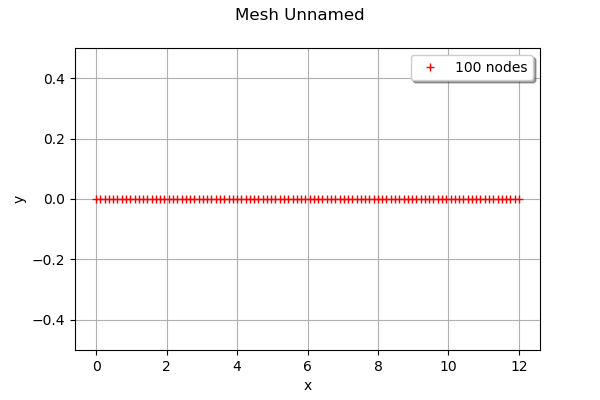

In [26]:
vertices = data[:,0]
mesh = ot.Mesh(vertices)
mesh.draw()

Create the ProcessSample from the data.

In [27]:
d_fields = 1
sample = ot.ProcessSample(mesh, n_fields, d_fields)
for i in range(n_fields):
    trajectory = data[:, i+1]
    sample[i] = ot.Field(mesh, trajectory)

Compute HDRPlot.

In [42]:
hdr = ProcessHighDensityRegionAlgorithm(sample, numberOfComponents=2)
hdr.setContoursAlpha([0.95, 0.5])
hdr.setOutlierAlpha(0.95)
hdr.run()
hdr.summary()

Number of trajectories = 1000
Number of vertices = 100


In [43]:
hdr.dimensionReductionSummary()

Number of components : 2
Part of variance : 0.9837
Explained variance ratio : [0.960558,0.0231678]


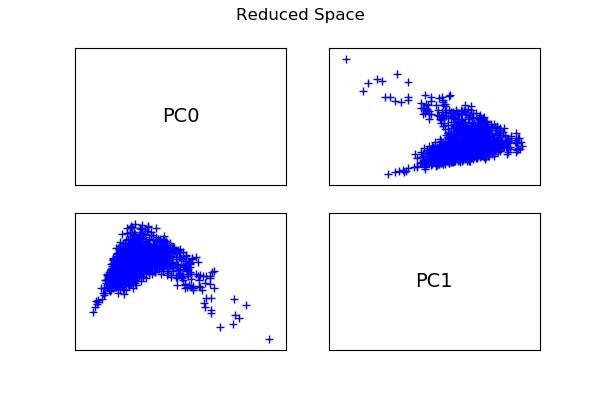

In [44]:
hdr.plotDimensionReduction()

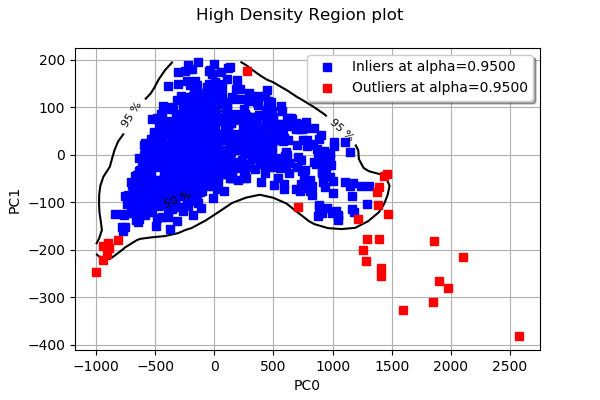

In [45]:
hdr.plotDensity(plotData=True)

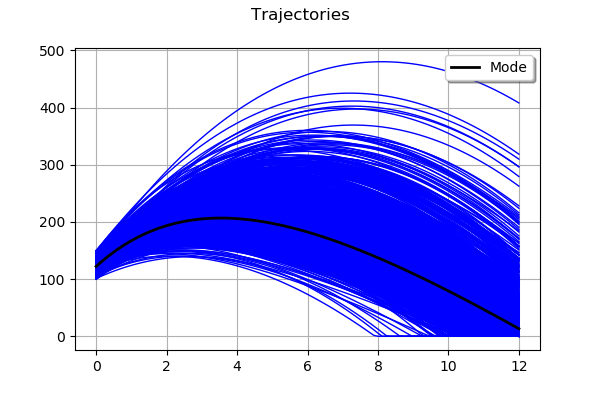

In [46]:
hdr.plotTrajectories()

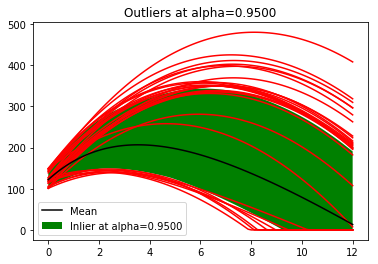

In [47]:
_ = hdr.plotOutlierTrajectories()

In [48]:
print("Outliers trajectories at alpha=%.4f" % (hdr.densityPlot.outlierAlpha))
outlierIndices = hdr.computeOutlierIndices()
outlierIndices

Outliers trajectories at alpha=0.9500


array([ 10,  32,  34,  55,  99, 108, 244, 319, 324, 349, 356, 367, 546,
       634, 646, 704, 716, 722, 731, 749, 774, 782, 795, 888, 916, 922,
       927, 931, 971], dtype=int64)